<a href="https://colab.research.google.com/github/juliannalf/CapstoneProject2Purwadhika/blob/main/Capstone2MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Daegu Apartment**

## **Contents**

1.   Business Problem Understanding
2.   Data Understanding
3.   Data Preprocessing
4.   Modeling
5.   Conclusion
6.   Recommendation
****



## **Business Problem Understanding**


Context

Apartemen merupakan salah satu solusi atas kebutuhan hunian masyarakat modern, khususnya di wilayah perkotaan dengan keterbatasan lahan pemukiman dan padatnya aktivitas bisnis. Permintaan apartemen terus meningkat, sehingga harga unit apartemen menjadi topik yang menarik untuk diteliti karena dipengaruhi oleh berbagai faktor internal maupun eksternal.

Umumnya, individu maupun perusahaan dapat menawarkan unit apartemen mereka di berbagai platform dengan menentukan harga jual sendiri. Namun, cara tersebut sering kali menyulitkan pemilik apartemen untuk menyesuaikan dengan harga pasar. Jika harga yang ditetapkan terlalu tinggi dibandingkan harga pasaran, maka akan sulit untuk mendapatkan pembeli. Sebaliknya, jika terlalu rendah, pemilik akan kehilangan potensi keuntungan maksimal.


Goals

Berdasarkan permasalahan tersebut, dibutuhkan sebuah tool prediksi harga apartemen yang mampu membantu pemilik dalam menentukan harga jual yang wajar, kompetitif, dan menguntungkan. Perbedaan fitur pada tiap apartemen, seperti lokasi, ukuran, tahun pembangunan, jumlah fasilitas, dan aksesibilitas, dapat dimanfaatkan untuk meningkatkan keakuratan prediksi harga. Dengan adanya tool prediksi ini, pemilik apartemen dapat lebih percaya diri menetapkan harga, sementara pembeli juga mendapatkan harga yang sesuai dengan kondisi pasar.

Analytic Approach

Langkah yang perlu dilakukan adalah menganalisis data apartemen untuk menemukan pola dari berbagai fitur yang berpengaruh terhadap harga jual. Selanjutnya, dibangun sebuah model regresi berbasis machine learning yang mampu memprediksi harga apartemen baru berdasarkan fitur-fitur yang dimilikinya. Model ini diharapkan menjadi dasar bagi tool prediksi harga yang membantu pemilik apartemen dalam menetapkan harga jual optimal.

Metric Evaluation

Evaluasi metrik yang digunakan meliputi RMSE, MAE, dan MAPE. RMSE mengukur rata-rata akar kuadrat error, MAE mengukur rata-rata nilai absolut error, sedangkan MAPE mengukur rata-rata persentase error. Semakin kecil nilai ketiga metrik tersebut, semakin akurat model dalam memprediksi harga apartemen.

Selain itu, jika model linear digunakan sebagai final model, R-squared atau adjusted R-squared dapat dipakai untuk menilai seberapa baik model menjelaskan varians data. Semakin mendekati 1, semakin baik model merepresentasikan data aktual.

## **Data Understanding**



*   Dataset merupakan data listing apartemen di kota Daegu, Korea Selatan.
*   Setiap baris data merepresentasikan informasi terkait unit apartemen beserta harga jualnya.

| **Attribute**                    | **Data Type** | **Description**                                              |
| -------------------------------- | ------------- | ------------------------------------------------------------ |
| Hallway Type                     | Object        | Jenis tipe koridor/hallway dari apartemen                    |
| TimeToSubway                     | Integer       | Waktu (menit) yang dibutuhkan menuju stasiun subway terdekat |
| SubwayStation                    | Object        | Nama stasiun subway terdekat                                 |
| N_FacilitiesNearBy(ETC)          | Integer       | Jumlah fasilitas umum lain yang berada di sekitar apartemen  |
| N_FacilitiesNearBy(PublicOffice) | Integer       | Jumlah fasilitas kantor pemerintahan di sekitar apartemen    |
| N_SchoolNearBy(University)       | Integer       | Jumlah universitas yang berada di sekitar apartemen          |
| N_Parkinglot(Basement)           | Integer       | Jumlah slot parkir basement yang tersedia                    |
| YearBuilt                        | Integer       | Tahun pembangunan apartemen                                  |
| N_FacilitiesInApt                | Integer       | Jumlah fasilitas internal di dalam apartemen                 |
| Size(sqft)                       | Float         | Luas unit apartemen dalam satuan square feet                 |
| SalePrice                        | Integer       | Harga jual apartemen (dalam Won)                             |



In [1]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import numpy as np                # perhitungan numerik
import pandas as pd               # manipulasi dataset (DataFrame)
import matplotlib.pyplot as plt   # visualisasi
import seaborn as sns             # visualisasi tambahan

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files

# Upload file dari laptop
uploaded = files.upload()

# Load dataset
df = pd.read_excel("DataDaeguApartment.xlsx")
df.head()



Saving DataDaeguApartment.xlsx to DataDaeguApartment.xlsx


,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0,30,20,12700,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,10,50,10,0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,10,70,30,560,1997,5,558,61946
3,mixed,5min~10min,Bangoge,50,50,40,7980,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0,10,20,5360,2006,5,1743,311504


### **Exploratory Data Analysis**

In [3]:
# Cek penamaan dalam index
print(df.columns)


Index(['HallwayType', 'TimeToSubway', 'SubwayStation',
       'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt',
       'N_FacilitiesInApt', 'Size(sqf)', 'SalePrice'],
      dtype='object')


**Distribution of Daegu Apartment SalePrice**

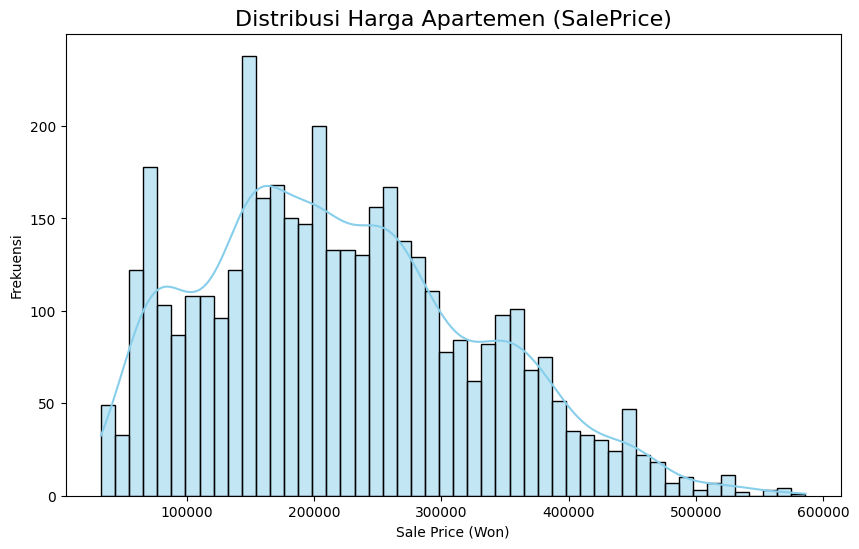

In [4]:
# Plot distribusi SalePrice
plt.figure(figsize=(10,6))
sns.histplot(df['SalePrice'], bins=50, kde=True, color="skyblue")

plt.title("Distribusi Harga Apartemen (SalePrice)", fontsize=16)
plt.xlabel("Sale Price (Won)")
plt.ylabel("Frekuensi")
plt.show()

Dapat dilihat bahwa nilai distribusi fitur SalePrice tidak simetris dan cenderung condong ke kanan (skewed to the right). Lebih banyak apartemen dengan harga di bawah 300,000 WON daripada diatas 400,000 WON. Jadi, dapat disimpulkan bahwa mayoritas apartemen di Daegu berharga lebih rendah, sementara harga tinggi relatif lebih jarang.

**Categorical feature related to SalePrice**

Terdapat 3 fitur kategorical yang dianalisis seperti tipe apartemen (HallwayType), Waktu yang dibutuhkan untuk ke stasiun Subway terdekat (TimeToSubway), dan Nama-nama stasiun (SubwayStation).

In [5]:
# Cek jumlah tipe koridor
print(f"Jumlah tipe koridor apartment di daerah Daegu:\n{df['HallwayType'].value_counts()}")

Jumlah tipe koridor apartment di daerah Daegu:
HallwayType
terraced    2528
mixed       1131
corridor     464
Name: count, dtype: int64


Dapat dilihat bahwa jumlah tipe koridor terbanyak adalah tipe terraced

In [6]:
# Cek median price untuk tiap tipe koridor
df_median_price = df.groupby(by=['HallwayType']).agg({'SalePrice':'median'}).reset_index()
df_median_price = df_median_price.set_index('HallwayType')
df_median_price = df_median_price.sort_values('SalePrice', ascending =False)
df_median_price.head()

,SalePrice
HallwayType,
terraced,264601.0
mixed,153539.0
corridor,74557.0


Tipe terraced memiliki nilai median tertinggi.

In [7]:
# Encode TimeToSubway jadi angka
mapping = {
    '0~5min': 1,
    '5min~10min': 2,
    '10min~15min': 3,
    '15min~20min': 4,
    'no_bus_stop_nearby': 5
}
df['TimeToSubway_encoded'] = df['TimeToSubway'].map(mapping)

# Hitung korelasi Pearson
corr = df[['TimeToSubway_encoded', 'SalePrice']].corr(method='pearson')
print(corr)


                      TimeToSubway_encoded  SalePrice
TimeToSubway_encoded              1.000000   0.042173
SalePrice                         0.042173   1.000000


Nilai korelasi antara TimeToSubway dan SalePrice adalah = 0.042173 (positif tetapi sangat lemah mendekati 0). Jarak ke Subway tidak punya pengaruh yang signifikan terhadap harga apartemen. Akan tetapi, pengaruh TimeToSubway lebih bersifat kontekstual dan non-linear, bukan hubungan linear sederhana. Jadi, akan tetap saya masukkan ke dalam perhitungan.

In [8]:
# Hitung jumlah stasiun per property
df['SubwayStation_count'] = df['SubwayStation'].apply(lambda x: len(str(x).split(',')))

# Hitung korelasi dengan SalePrice
corr_subway = df[['SubwayStation_count', 'SalePrice']].corr()

print(corr_subway)


                     SubwayStation_count  SalePrice
SubwayStation_count                  NaN        NaN
SalePrice                            NaN        1.0


Saat ini jumlah stasiun subway (SubwayStation_count) tidak bisa dipakai untuk melihat hubungan dengan harga (SalePrice) karena datanya tidak variatif atau tidak terbaca dengan benar.

**Numerical feature related to SalePrice**

In [9]:
# Hitung korelasi antara Size dan SalePrice
corr_size = df[['Size(sqf)', 'SalePrice']].corr()

print(corr_size)


           Size(sqf)  SalePrice
Size(sqf)   1.000000   0.697685
SalePrice   0.697685   1.000000


Korelasi Size dengan SalePrice mendekati 0.7, menunjukkan korelasi positif yang kuat. Artinya semakin besar ukuran apartemen maka harga jual cenderung semakin tinggi.

In [10]:
# Hitung korelasi antara N_Parkinglot(basement) dan SalePrice
corr_parking = df[['N_Parkinglot(Basement)', 'SalePrice']].corr()

print(corr_parking)


                        N_Parkinglot(Basement)  SalePrice
N_Parkinglot(Basement)                1.000000   0.472419
SalePrice                             0.472419   1.000000


Korelasi antara tempat parkir basement dengan SalePrice adalah 0.47 ini termasuk korelasi sedang (moderate positive correlation). Sesuai dengan rule of thumb: 0.3–0.5 = sedang, >0.5 = kuat. Nilainya positif menunjukkan bahwa semakin banyak jumlah parkir di basement, cenderung semakin tinggi harga jual rumah.

# **Data Preprocessing**

Pada tahap ini, kita akan melakukan cleaning pada data yang nantinya data yang sudah dibersihkan akan kita gunakan untuk proses analisis selanjutnya. Beberapa hal yang perlu dilakukan adalah:


*   Drop fitur yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi.
*   Melakukan treatment terhadap missing value jika ada. Bisa dengan cara men-drop fiturnya jika memang tidak dibutuhkan atau bisa juga dengan mengimputasi dengan nilai yang paling masuk akal berdasarkan kasusnya.

Untuk proses data preprocessing dan feature engineering, kita akan menggunakan dataframe hasil duplikasi dari dataframe yang sebelumnya digunakan.

In [11]:
# Membuat duplikasi dataframe
df_model = df.copy()

In [12]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df_model.columns:
    n_unique = df_model[col].nunique()
    n_sample = min(2, n_unique)  # ambil maksimal 2, sesuai jumlah unik
    sample_values = list(df_model[col].drop_duplicates().sample(n_sample).values)

    listItem.append([
        col,
        df_model[col].dtype,
        df_model[col].isna().sum(),
        round((df_model[col].isna().sum() / len(df_model[col])) * 100, 2),
        n_unique,
        sample_values
    ])

df_model_desc = pd.DataFrame(
    columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
    data=listItem
)

df_model_desc


,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,HallwayType,object,0,0.00,3,"[terraced, mixed]"
1,TimeToSubway,object,0,0.00,5,"[no_bus_stop_nearby, 5min~10min]"
2,SubwayStation,object,0,0.00,8,"[Daegu, Bangoge]"
3,N_FacilitiesNearBy(ETC),int64,0,0.00,4,"[20, 10]"
4,N_FacilitiesNearBy(PublicOffice),int64,0,0.00,8,"[10, 50]"
5,N_SchoolNearBy(University),int64,0,0.00,6,"[0, 30]"
6,N_Parkinglot(Basement),int64,0,0.00,20,"[12700, 1810]"
7,YearBuilt,int64,0,0.00,16,"[1986, 1997]"
8,N_FacilitiesInApt,int64,0,0.00,9,"[7, 3]"
9,Size(sqf),int64,0,0.00,89,"[1643, 1149]"


Dari info dataset di atas, terdapat data yang kosong pada beberapa fitur atau kolom. Selanjutnya, kita perlu mengobservasi lebih lanjut terkait data-data yang hilang tersebut agar dapat menentukan langkah treatment yang tepat untuk mengatasinya.

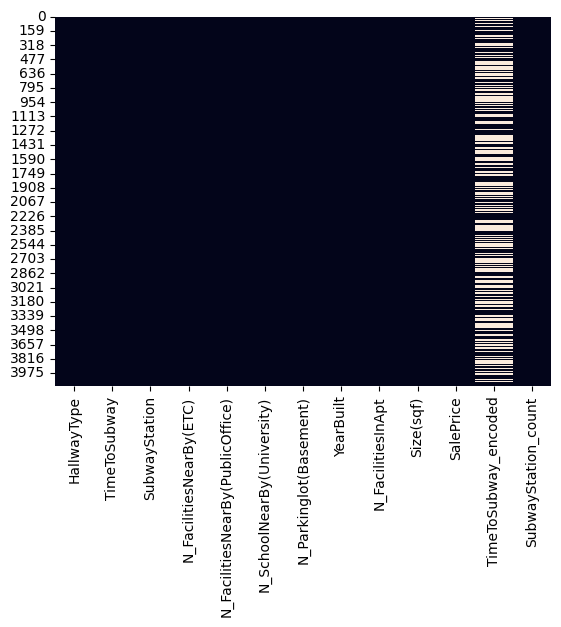

In [13]:
# Missing value heatmap
sns.heatmap(df_model.isnull(), cbar=False);

In [14]:
# Hitung missing values
missing_summary = df_model.isna().sum().reset_index()
missing_summary.columns = ['feature', 'n_missing']

# Tambahkan persentase
missing_summary['pct_missing'] = (missing_summary['n_missing'] / len(df_model)) * 100

# Urutkan dari yang paling banyak missing
missing_summary = missing_summary.sort_values(by='pct_missing', ascending=False)

print(missing_summary)


                             feature  n_missing  pct_missing
11              TimeToSubway_encoded       1953    47.368421
1                       TimeToSubway          0     0.000000
2                      SubwayStation          0     0.000000
3            N_FacilitiesNearBy(ETC)          0     0.000000
0                        HallwayType          0     0.000000
4   N_FacilitiesNearBy(PublicOffice)          0     0.000000
5         N_SchoolNearBy(University)          0     0.000000
7                          YearBuilt          0     0.000000
6             N_Parkinglot(Basement)          0     0.000000
8                  N_FacilitiesInApt          0     0.000000
9                          Size(sqf)          0     0.000000
10                         SalePrice          0     0.000000
12               SubwayStation_count          0     0.000000


Terdapat 1 fitur yang memiliki missing value. Fitur 'TimeToSubway_encoded' memiliki missing value, persentasenya mencapai 47% dari total data.

In [15]:
# hapus data duplikat
df_model = df_model.drop_duplicates()


In [16]:
# Cek data duplikat
df_model.duplicated().sum()

np.int64(0)

**Drop Columns**

Tentu perlu ada pertimbangan sebelum melakukan drop pada kolom atau fitur. Sebagai pertimbangan, pada tahap awal ini kita bisa menggunakan domain knowledge untuk memutuskan kira-kira fitur mana saja yang dirasa tidak memiliki relevansi. Jika ditinjau berdasar domain knowledge, fitur 'SubwayStation', ' SubwayStation_count' dan 'TimeToSubway_encoded' tidak memiliki relevansi dan kepentingan untuk analisis prediktif.


In [17]:
# Drop beberapa kolom yang tidak diperlukan
df_model.drop(['SubwayStation', 'SubwayStation_count', 'TimeToSubway_encoded'], axis=1, inplace=True)

In [18]:
# Cek info dataset
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2701 entries, 0 to 4121
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   HallwayType                       2701 non-null   object
 1   TimeToSubway                      2701 non-null   object
 2   N_FacilitiesNearBy(ETC)           2701 non-null   int64 
 3   N_FacilitiesNearBy(PublicOffice)  2701 non-null   int64 
 4   N_SchoolNearBy(University)        2701 non-null   int64 
 5   N_Parkinglot(Basement)            2701 non-null   int64 
 6   YearBuilt                         2701 non-null   int64 
 7   N_FacilitiesInApt                 2701 non-null   int64 
 8   Size(sqf)                         2701 non-null   int64 
 9   SalePrice                         2701 non-null   int64 
dtypes: int64(8), object(2)
memory usage: 232.1+ KB


Sekarang kolom 'SubwayStation', ' SubwayStation_count' dan 'TimeToSubway_encoded' sudah tidak ada.

**Missing Value**

In [19]:
# Cek nilai missing value
df_model.isnull().sum()

,0
HallwayType,0
TimeToSubway,0
N_FacilitiesNearBy(ETC),0
N_FacilitiesNearBy(PublicOffice),0
N_SchoolNearBy(University),0
N_Parkinglot(Basement),0
YearBuilt,0
N_FacilitiesInApt,0
Size(sqf),0
SalePrice,0


Tidak ada missing value dalam dataset. Selanjutnya kita juga perlu mengecek apakah terdapat nilai-nilai yang dirasa tidak masuk akal pada setiap fiturnya, misal ada nilai yang kurang dari 0. Kita bisa mengeceknya melalui statistika deskriptif untuk tiap numerikal fitur.

In [20]:
# Cek deskriptif statistik fitur numerikal
num_features = [feature for feature in df_model.columns if ((df_model[feature].dtypes != 'object'))]
df_model[num_features].describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000
mean,18.904110,40.270270,26.804887,5337.463902,2002.358386,5.713439,984.028878,229511.365790
std,21.531683,18.874858,15.044701,4182.248595,9.151949,2.386552,391.982619,105079.891321
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,30.000000,20.000000,1810.000000,1993.000000,4.000000,743.000000,153539.000000
50%,10.000000,40.000000,20.000000,5360.000000,2006.000000,5.000000,910.000000,221238.000000
75%,50.000000,50.000000,40.000000,7980.000000,2007.000000,7.000000,1167.000000,300884.000000
max,50.000000,70.000000,50.000000,13210.000000,2015.000000,10.000000,2337.000000,585840.000000


Dari data diatas, untuk fitur 'N_FacilitiesNearBy(ETC)' dan 'N_SchoolNearBy(University)' bukan jumlah asli, tapi batas maksimum (cap/truncated).

In [21]:
# Cek kembali dataset info
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2701 entries, 0 to 4121
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   HallwayType                       2701 non-null   object
 1   TimeToSubway                      2701 non-null   object
 2   N_FacilitiesNearBy(ETC)           2701 non-null   int64 
 3   N_FacilitiesNearBy(PublicOffice)  2701 non-null   int64 
 4   N_SchoolNearBy(University)        2701 non-null   int64 
 5   N_Parkinglot(Basement)            2701 non-null   int64 
 6   YearBuilt                         2701 non-null   int64 
 7   N_FacilitiesInApt                 2701 non-null   int64 
 8   Size(sqf)                         2701 non-null   int64 
 9   SalePrice                         2701 non-null   int64 
dtypes: int64(8), object(2)
memory usage: 232.1+ KB


**Data Correlation**

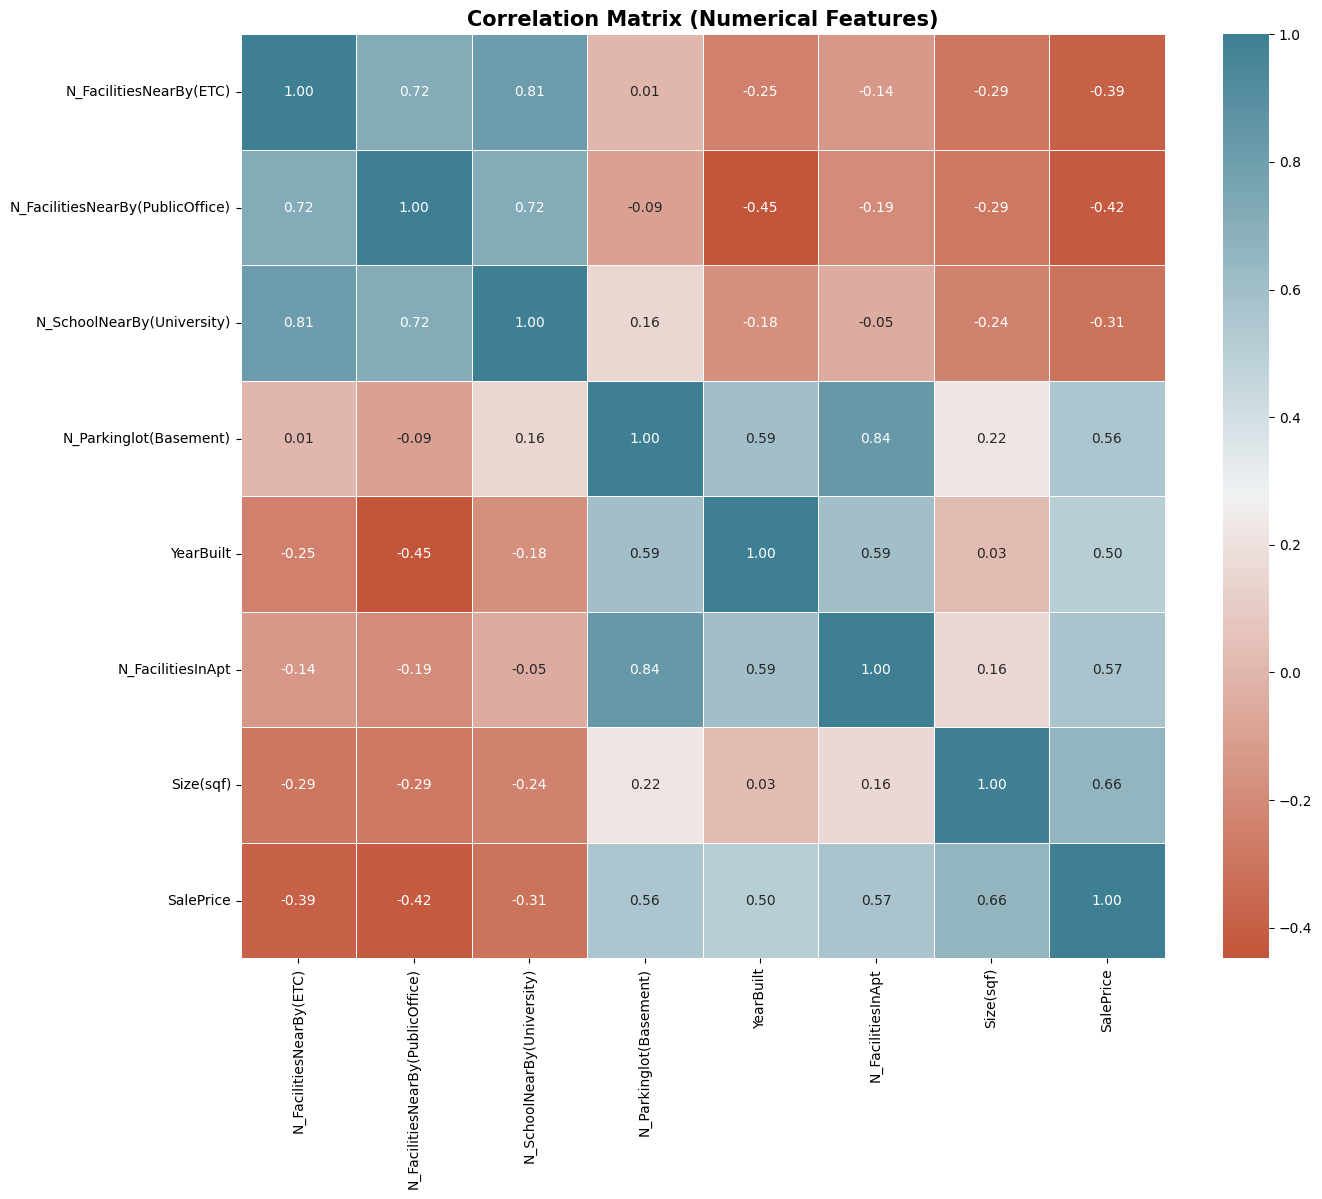

In [22]:
# Correlation matrix
# 1. Ambil hanya kolom numerik (pastikan exclude object)
num_features = df_model.select_dtypes(include=['int64','float64']).columns

# 2. Buang baris yang ada NaN/inf akibat log
df_corr = df_model[num_features].replace([np.inf, -np.inf], np.nan).dropna()

# 3. Hitung korelasi
corr = df_corr.corr(method='pearson')

# 4. Plot
plt.figure(figsize=(15, 12))
palette = sns.diverging_palette(20, 220, n=256)
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix (Numerical Features)', size=15, weight='bold')
plt.show()


Correlation Matrix menunjukkan bahwa fitur 'Size(sqft)', 'N_FacilitiesInApt', 'N_Parkinglot(Basement)' dan 'YearBuilt' berpengaruh positif kepada tingginya harga. Sedangkan, fitur 'N_FacilitiesNearBy(PublicOffice)', 'N_FacilitiesNearBy(ETC)' dan 'N_SchoolNearBy(University)' berpengaruh negatif terhadap SalePrice.

Selanjutnya, kita akan mengecek distribusi data dan outliers untuk tiap numerikal fitur. Jika distribusinya memiliki skewness yang tinggi, salah satu cara yang dapat kita lakukan untuk menguranginya adalah dengan melakukan rekayasa pada tiap fiturnya.

**Outliers Detection**

Banyaknya outliers pada data tentu akan memengaruhi hasil analisis dan pemodelan yang dilakukan. Ada beberapa hal yang harus dipertimbangkan sebelum memutuskan treatment yang sesuai dengan data, di antaranya adalah dengan mempertimbangkan sisi domain knowledge.

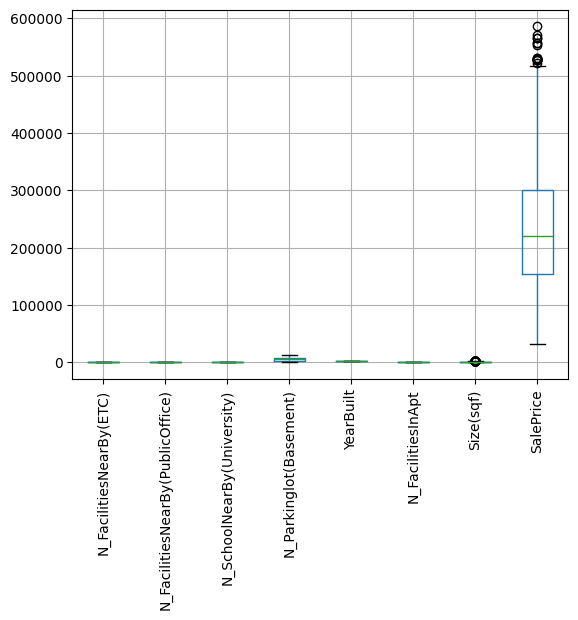

In [23]:
# Plot boxplot untuk mengecek outliers
df_model.boxplot(rot=90);

Terdapat 2 fitur yang memiliki Outlier, yaitu 'Size(sqf) dan 'SalePrice'. Dalam project ini, untuk membuat dataset yang lebih bersih dari outliers, saya akan melakukan beberapa rekayasa data pada fitur-fitur dengan mempertimbangkan kombinasi antara hasil dari metode IQR dan juga domain knowledge. Nantinya, model yang dihasilkan hanya terbatas dapat memprediksi listing baru yang nilai-nilainya pada rentang data berdasarkan 'clean dataset' ini saja. Di luar rentang data, hasil prediksi dari model akan menjadi bias.

In [24]:
# Membuat fungsi untuk mengecek outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')

In [25]:
# Outliers pada fitur N_Parkinglot(Basement)
find_anomalies(df_model['N_Parkinglot(Basement)'])

IQR: 6170.0
limit_bawah: -7445.0
limit_atas: 17235.0


In [26]:
# Outliers pada fitur Size
find_anomalies(df_model['Size(sqf)'])

IQR: 424.0
limit_bawah: 107.0
limit_atas: 1803.0


In [27]:
# Outliers pada fitur SalePrice
find_anomalies(df_model['SalePrice'])

IQR: 147345.0
limit_bawah: -67478.5
limit_atas: 521901.5


Selanjutnya, kita dapat memulai feature engineering terhadap fitur-fitur numerikal.

**N_Parkinglot(Basement)**

In [28]:
# Cek deskriptif statistik kolom N_Parkinglot(Basement)
df_model['N_Parkinglot(Basement)'].describe()

,N_Parkinglot(Basement)
count,2701.000000
mean,5337.463902
std,4182.248595
min,0.000000
25%,1810.000000
50%,5360.000000
75%,7980.000000
max,13210.000000


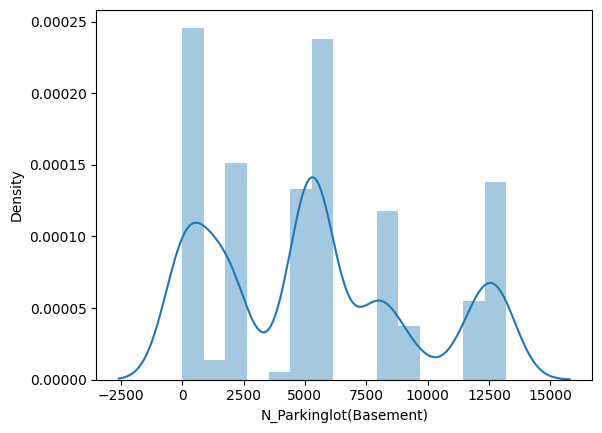

In [29]:
# Plot distribusi fitur N_Parkinglot(Basement)
sns.distplot(df_model['N_Parkinglot(Basement)']);

Data belum terlalu bermasalah, tetapi ada kemungkinan skewed to the right.

**Size(sqf)**

In [30]:
# Cek deskriptif statistik kolom Size(sqf)
df_model['Size(sqf)'].describe()

,Size(sqf)
count,2701.000000
mean,984.028878
std,391.982619
min,135.000000
25%,743.000000
50%,910.000000
75%,1167.000000
max,2337.000000


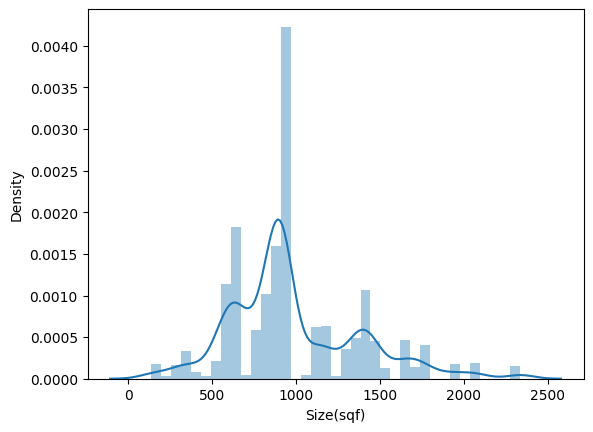

In [31]:
# Plot distribusi fitur Size(sqf)
sns.distplot(df_model['Size(sqf)']);

Terdapat lonjakan data yang menunjukkan skewed to the right.

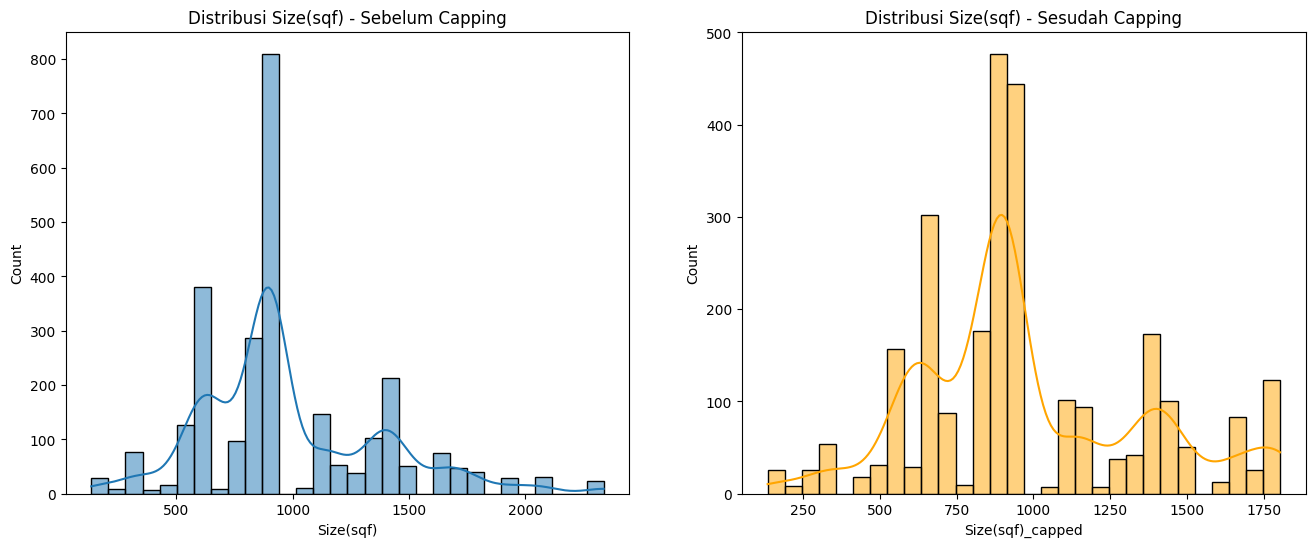

In [32]:
# Batasi data agar terlihat lebih simetris
# Hitung IQR
Q1 = df_model['Size(sqf)'].quantile(0.25)
Q3 = df_model['Size(sqf)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping outlier
df_model['Size(sqf)_capped'] = df_model['Size(sqf)'].clip(lower=lower_bound, upper=upper_bound)

# Plot distribusi sebelum dan sesudah capping
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.histplot(df_model['Size(sqf)'], kde=True, bins=30)
plt.title("Distribusi Size(sqf) - Sebelum Capping")

plt.subplot(1,2,2)
sns.histplot(df_model['Size(sqf)_capped'], kde=True, bins=30, color="orange")
plt.title("Distribusi Size(sqf) - Sesudah Capping")

plt.show()


**Price**

In [33]:
# Cek deskriptif statistik kolom price
df_model['SalePrice'].describe()

,SalePrice
count,2701.000000
mean,229511.365790
std,105079.891321
min,32743.000000
25%,153539.000000
50%,221238.000000
75%,300884.000000
max,585840.000000


In [34]:
# Cek price > 521901.5 WON
df_model[df_model['SalePrice'] > 521901.5].count()['SalePrice']

np.int64(17)

Terlihat bahwa 75% data pada kolom SalePrice bernilai kurang dari 300.884 WON, sedangkan nilai maksimalnya adalah 585.840 WON. Tentu terdapat skewness pada distribusinya, yaitu tail yang memanjang di sebelah kanan (positive skewness). Terdapat 17 data yang nilai price-nya lebih besar dari 521901.5 WON (batas atas berdasarkan metode IQR). Oleh karena itu, data yang memiliki price lebih besar dari 521901.5 WON tidak akan dimasukkan ke dalam pemodelan, sehingga skewness-nya pun akan berkurang. Hal ini tentu akan menjadi limitasi untuk model yang nantinya dibangun.

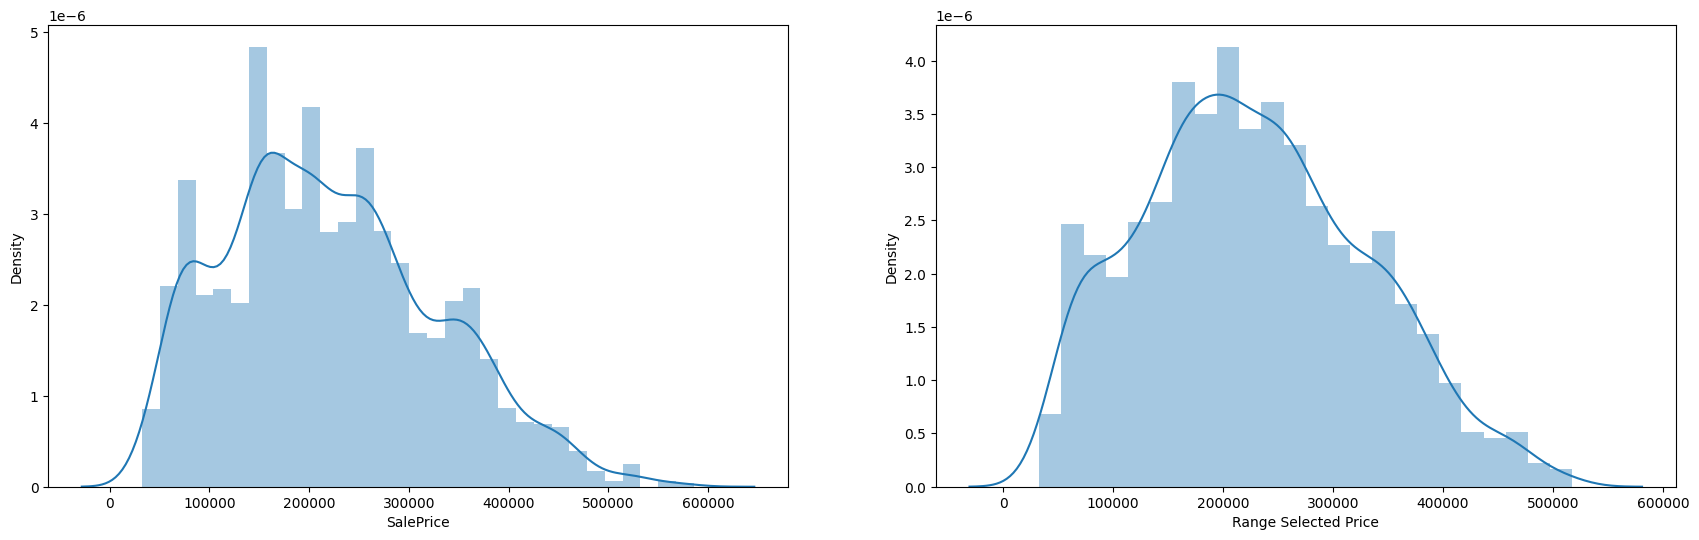

In [35]:
# Melakukan filtering pada data
df_model = df_model[(df_model['SalePrice'] <= 521901.5)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['SalePrice'], ax=axes[0])
sns.distplot(df_model['SalePrice'], ax=axes[1])
axes[0].set_xlabel('SalePrice')
axes[1].set_xlabel('Range Selected Price');

In [36]:
# Cek deskriptif statistik kolom 'price' setelah filtering
df_model['SalePrice'].describe()

,SalePrice
count,2684.000000
mean,227524.476528
std,102380.847211
min,32743.000000
25%,153097.000000
50%,220088.000000
75%,297455.500000
max,517699.000000


**Normalisasi kategori pada fitur TimeToSubway**

In [37]:
# Cek data fitur TimeToSubway
print(df_model['TimeToSubway'].unique())


['0-5min' '10min~15min' '15min~20min' '5min~10min' 'no_bus_stop_nearby']


In [38]:
df_model['TimeToSubway'] = df_model['TimeToSubway'].replace({
    '0-5min': '0~5min',
    '5min~10min': '5~10min',
    '10min~15min': '10~15min',
    '15min~20min': '15+min',   # anggap sama dengan 15+min
    'no_bus_stop_nearby': 'no_subway_nearby'
})


**Clean Dataset**

In [39]:
# Cek dataset yang sudah bersih
df_model.head()

,HallwayType,TimeToSubway,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice,Size(sqf)_capped
0,terraced,0~5min,0,30,20,12700,2007,10,1387,346017,1387
1,terraced,10~15min,10,50,10,0,1986,4,914,150442,914
2,mixed,15+min,10,70,30,560,1997,5,558,61946,558
3,mixed,5~10min,50,50,40,7980,2005,7,914,165486,914
4,terraced,0~5min,0,10,20,5360,2006,5,1743,311504,1743


In [40]:
# Cek kembali info dataset
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2684 entries, 0 to 4121
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   HallwayType                       2684 non-null   object
 1   TimeToSubway                      2684 non-null   object
 2   N_FacilitiesNearBy(ETC)           2684 non-null   int64 
 3   N_FacilitiesNearBy(PublicOffice)  2684 non-null   int64 
 4   N_SchoolNearBy(University)        2684 non-null   int64 
 5   N_Parkinglot(Basement)            2684 non-null   int64 
 6   YearBuilt                         2684 non-null   int64 
 7   N_FacilitiesInApt                 2684 non-null   int64 
 8   Size(sqf)                         2684 non-null   int64 
 9   SalePrice                         2684 non-null   int64 
 10  Size(sqf)_capped                  2684 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 251.6+ KB


Terdapat penurunan dataset dari 2701 menjadi 2684, sekitar 17 data yang dihilangkan.

# **Modelling**

In [41]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

**Encoding**

Agar dapat menggunakan semua fitur yang dipilih, maka fitur-fitur kategorikal harus diubah menjadi fitur numerikal. Kita dapat menggunakan ColumnTransformer untuk dapat mengubah tipe datanya, yang mana nanti dapat diaplikasikan pada pipeline model.

In [42]:
# Mengubah fitur kategorikal menjadi numerikal

# Definisikan kolom kategorikal
categorical_features = ['HallwayType', 'TimeToSubway']

# Encoder:
# - HallwayType pakai OneHotEncoder (kategori kecil dan tidak ada urutan alami)
# - TimeToSubway pakai OrdinalEncoder (ada urutan: dekat → jauh)
transformer = ColumnTransformer([
    ('hallway', OneHotEncoder(drop='first'), ['HallwayType']),
    ('subway', OrdinalEncoder(categories=[['0~5min', '5~10min', '10~15min', '15+min', 'no_subway_nearby']]), ['TimeToSubway'])
], remainder='passthrough')


**Data Splitting**

In [43]:
# Memisahkan data independen variabel dengan target
X = df_model.drop(['SalePrice'], axis=1)
y = df_model['SalePrice']

**Train and Test Data Splitting**

In [44]:
# Splitting data training dan test dengan proporsi 70:30
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=1)

**Choose a Benchmark Model**

In [45]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:

    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_root_mean_squared_error',
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_error',
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator,
        X_train,
        y_train,
        cv=crossval,
        scoring='neg_mean_absolute_percentage_error',
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-54799.51677411 -54436.92167501 -54841.65221215 -53260.48272517
 -54964.94337104] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-44280.08746442 -44236.42161447 -44661.39599675 -42639.70421329
 -44081.37005888] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.21210205 -0.22069123 -0.22567046 -0.21509847 -0.21275723] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-46240.97643577 -47150.29982977 -50703.97316358 -45806.61359012
 -50663.90709582] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-36787.7848083  -37020.38245422 -40455.64471885 -35324.35057758
 -39605.62159446] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,


In [46]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-54460.703351,625.343056,-43979.795870,696.674029,-0.217264,0.005178
1,KNN Regressor,-48113.154023,2143.406212,-37838.756831,1900.864589,-0.192183,0.006653
2,DecisionTree Regressor,-46224.128322,2770.397906,-36649.015953,2113.843334,-0.184805,0.009996
3,RandomForest Regressor,-45996.293263,2787.394925,-36532.637765,2129.120423,-0.183382,0.009703
4,XGBoost Regressor,-45984.632031,2808.336145,-36546.239062,2162.743886,-0.183635,0.010042


Model terbaik adalah RandomForest Regressor dan XGBoost Regressor. Kedua model ini memberikan nilai error (RMSE dan MAPE) paling kecil dibanding model lain.
Model terburuk adalah Linear Regression karena tidak bisa menangkap kompleksitas data (underfitting). Selanjutnya, akan dilakukan prediksi pada test set dengan 2 benchmark model terbaik, yaitu XGBoost dan RandomForest.

**Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model XGBoost dan Random Forest

In [47]:
# Benchmark 2 model terbaik
models = {
    'XGB': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,45409.429153,37148.636719,0.188968
RandomForest,45338.629705,37000.454291,0.189688


Berdasarkan hasil evaluasi model sebelum dilakukan tuning, algoritma XGBoost (XGB) menunjukkan performa yang kompetitif dibandingkan RandomForest dengan nilai RMSE sebesar 45.409, MAE sebesar 37.148, dan MAPE sebesar 18,89%. Walaupun RandomForest sedikit lebih unggul pada RMSE dan MAE, selisih performa antara keduanya relatif sangat kecil sehingga dapat dikatakan keduanya memiliki akurasi yang sebanding. Namun, XGBoost tetap dipilih sebagai model utama karena memiliki fleksibilitas yang tinggi, kemampuan generalisasi yang baik, serta potensi untuk memberikan hasil lebih optimal setelah dilakukan hyperparameter tuning. Dengan keunggulan tersebut, XGBoost dinilai lebih sesuai untuk digunakan sebagai model akhir dalam memprediksi harga properti.


**Hyperparameter Tuning**

Pada tahap ini, kita akan melakukan hyperparameter tuning pada model XGBoost dengan harapan dapat meningkatkan performa model.

Untuk panduan tuning model XGBoost, dapat merujuk ke [Tuning XGBoost](https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters).

In [48]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth,
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [49]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb,
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval,
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1
)

In [50]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('hallway',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['HallwayType']),
                                                                              ('subway',
                                                                               OrdinalEncoder(categories=[['0~5min',
                                                                                                           '5~10min',
                                                                                                           '10~15min',
                                                                                                           '15+min',
                                                                                                           'no_subway_nearby']]),
                                                                               ['TimeToSubway'])])),
                                             ('scale...
                                                             np.float64(3.593813663804626),
                                                             np.float64(10.0)],
                                        'model__subsample': [np.float64(0.2),
                                                             np.float64(0.3),
                                                             np.float64(0.4),
                                                             np.float64(0.5),
                                                             np.float64(0.6),
                                                             np.float64(0.7),
                                                             np.float64(0.8),
                                                             np.float64(0.9)]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [51]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
24,0.084080,0.002453,0.013947,0.000138,0.9,10.000000,146,4,0.06,5,...,1858.187250,1,-0.176428,-0.193495,-0.203133,-0.192159,-0.188292,-0.190701,0.008649,7
17,0.143942,0.002378,0.017442,0.002904,0.6,0.001000,190,5,0.04,9,...,2022.166754,2,-0.175882,-0.191297,-0.204860,-0.189714,-0.188225,-0.189996,0.009220,2
22,0.098548,0.018689,0.014530,0.000463,0.7,0.002783,155,4,0.25,8,...,1978.794104,3,-0.176628,-0.190625,-0.204504,-0.186788,-0.189666,-0.189642,0.008937,1
20,0.089853,0.002430,0.014339,0.000264,0.9,0.007743,143,4,0.38,6,...,2123.527175,4,-0.177444,-0.190128,-0.207059,-0.187362,-0.189459,-0.190290,0.009545,3
18,0.082971,0.009933,0.015946,0.002500,0.9,0.007743,177,2,0.83,10,...,2202.479974,15,-0.177596,-0.189152,-0.210160,-0.187196,-0.190347,-0.190890,0.010630,9


In [52]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -45568.15078125
Best_params: {'model__subsample': np.float64(0.9), 'model__reg_alpha': np.float64(10.0), 'model__n_estimators': np.int64(146), 'model__max_depth': np.int64(4), 'model__learning_rate': np.float64(0.06), 'model__gamma': np.int64(5), 'model__colsample_bytree': np.float64(0.4)}


**Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terpilih.

In [53]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,45106.412138,36951.917969,0.189552


**Performance Comparison**

Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning.

In [54]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE
XGB,45409.429153,37148.636719,0.188968


In [55]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
XGB,45106.412138,36951.917969,0.189552


Model mengalami peningkatan performa (nilai RMSE, MAE & MAPE berkurang) dengan dilakukannya hyperparameter tuning, walaupun hanya sedikit.
- RMSE, MAE & MAPE sebelum tuning: 45.40, 37.14, 0.188
- RMSE, MAE & MAPE setelah tuning: 45.10, 36.95, 0.189

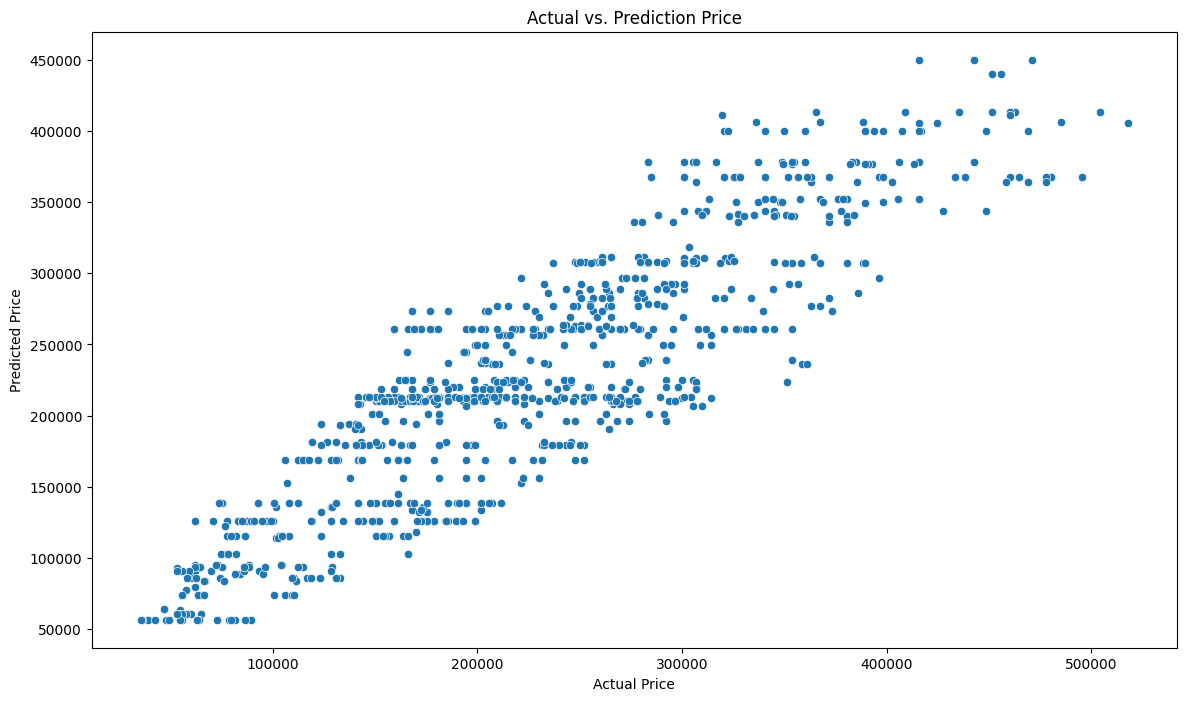

In [56]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price',
                                               xlabel='Actual Price',
                                               ylabel='Predicted Price');

Model mampu menangkap pola harga aktual dengan cukup baik karena sebagian besar prediksi mengikuti garis diagonal. Namun, masih terdapat deviasi pada harga tinggi (cenderung *underestimate*) dan harga rendah (cenderung *overestimate*), yang tercermin dari perbedaan nilai RMSE dan MAE. Dengan MAPE sekitar 18–19%, model tetap termasuk dalam kategori *good forecasting* (Lewis, 1982), sehingga hasil prediksi dapat dianggap cukup reliabel.

*Source: Lewis, C. D. (1982). Industrial and business forecasting methods: A practical guide to exponential smoothing and curve fitting*

**Feature Importances**

Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi target (SalePrice), kita dapat mengeceknya melalui function feature_importances_.

<Axes: title={'center': 'Feature Importances'}>

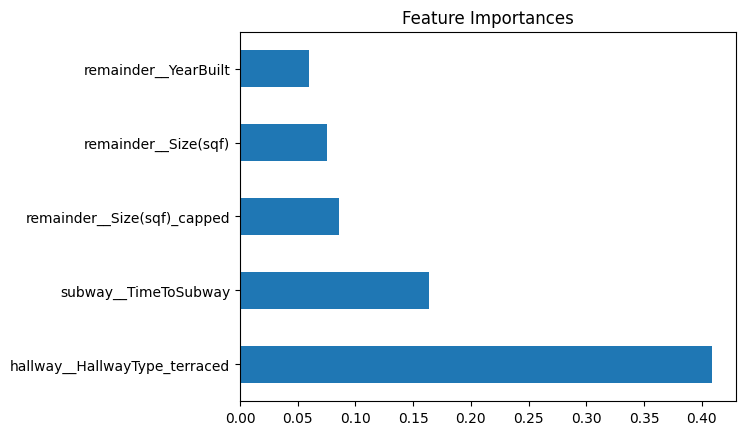

In [57]:
# Plot feature importances
# ambil nama fitur hasil transformasi
feature_names = transformer.get_feature_names_out()

# buat dataframe/series feature importance
feature_imp = pd.Series(
    xgb_tuning['model'].feature_importances_,
    index=feature_names
).sort_values(ascending=False).head()

# plot
feature_imp.plot(kind='barh', title='Feature Importances')


# **Conclusion**

Berdasarkan hasil pemodelan yang telah dilakukan, fitur yang paling berpengaruh terhadap harga properti adalah HallwayType (terraced) dan TimeToSubway. Kedua fitur ini memiliki kontribusi paling besar dalam menentukan variasi harga, dibandingkan dengan fitur lain seperti YearBuilt dan Size (sqft) yang pengaruhnya relatif lebih kecil.

Hal ini menunjukkan bahwa faktor aksesibilitas (jarak ke subway) serta tipe hallway (yang berhubungan dengan kualitas atau kenyamanan bangunan) lebih dominan dalam memengaruhi harga properti, dibandingkan dengan ukuran bangunan atau tahun pembangunan.

Berdasarkan pemodelan yang sudah dilakukan, hasil evaluasi menggunakan metrik RMSE, MAE, dan MAPE menunjukkan bahwa model yang dibangun (Random Forest dan XGBoost) mampu memberikan performa prediksi yang cukup baik. Nilai MAPE yang diperoleh sekitar 18–19%, yang menurut Lewis (1982) termasuk dalam kategori good forecasting.

Meski demikian, masih terdapat bias pada hasil prediksi, di mana pada harga aktual yang rendah model cenderung melakukan overestimation, sedangkan pada harga aktual yang tinggi model cenderung melakukan underestimation. Hal ini juga terlihat dari adanya perbedaan signifikan antara nilai RMSE dan MAE, yang mengindikasikan adanya error besar pada sebagian data (outlier).

Dengan kata lain, model sudah cukup mampu menangkap pola umum antara variabel prediktor dan harga aktual, namun masih terdapat ruang untuk perbaikan agar hasil prediksi menjadi lebih presisi.

# **Recommendation**

1. **Melakukan feature engineering lebih lanjut**
   Dari hasil analisis, terlihat bahwa fitur HallwayType terraced dan TimeToSubway memiliki pengaruh terbesar terhadap prediksi harga. Hal ini membuka peluang untuk melakukan feature engineering dengan menambahkan variabel baru yang lebih representatif, seperti kualitas lingkungan sekitar (keamanan, kebersihan), kondisi aksesibilitas selain subway (seperti kedekatan dengan jalan utama, atau pusat perbelanjaan), serta faktor eksternal seperti tingkat kebisingan dan polusi. Dengan menambah variabel yang lebih relevan, model berpotensi menghasilkan prediksi harga yang lebih akurat.

2. **Menggunakan teknik ensemble atau stacking**
   Hasil evaluasi model sebelumnya menunjukkan bahwa model seperti Random Forest dan XGBoost memberikan performa cukup baik, namun masih terdapat error yang signifikan (RMSE dan MAE cukup besar). Oleh karena itu, disarankan untuk mencoba pendekatan ensemble atau stacking yang mengombinasikan keunggulan beberapa algoritma sekaligus. Misalnya, mengombinasikan Random Forest, XGBoost, dan model linear dalam satu kerangka stacking. Dengan cara ini, kelemahan satu model bisa ditutupi oleh model lain, sehingga performa keseluruhan dapat meningkat.

3. **Melakukan A/B testing untuk mengukur konsistensi model**
   Untuk memastikan model yang dibangun tidak hanya bekerja baik pada data training, tetapi juga pada data baru, penting untuk melakukan A/B testing atau evaluasi pada dataset terpisah. A/B testing dapat dilakukan dengan membandingkan performa model lama dengan model yang sudah ditingkatkan melalui feature engineering dan ensemble. Dengan cara ini, kita bisa mengukur konsistensi dan efektivitas prediksi dalam kondisi nyata. Selain itu, A/B testing juga memungkinkan identifikasi bias prediksi (misalnya overestimation pada harga rendah atau underestimation pada harga tinggi) yang sudah terlihat pada analisis awal, sehingga langkah perbaikan bisa lebih terarah.

Secara keseluruhan, langkah-langkah ini diharapkan dapat memperbaiki kelemahan model yang masih ada, mengurangi tingkat error, serta menghasilkan sistem prediksi harga properti yang lebih stabil dan reliabel.


# **Save Model**

In [58]:
import pickle
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Definisikan pipeline
pipeline = Pipeline([
    ('preprocess', ColumnTransformer([
        ('hallway', OneHotEncoder(drop='first'), ['HallwayType']),
        ('subway', OrdinalEncoder(categories=[['0~5min', '5~10min', '10~15min', '15+min', 'no_subway_nearby']]), ['TimeToSubway'])
    ], remainder='passthrough')),

    ('model', XGBRegressor())
])

# Fit model dengan data train
pipeline.fit(X_train, y_train)

# Simpan model ke file .sav
filename = 'Model_DaeguApartment_XGB.sav'
pickle.dump(pipeline, open(filename, 'wb'))

print(f"✅ Model berhasil disimpan ke file: {filename}")


✅ Model berhasil disimpan ke file: Model_DaeguApartment_XGB.sav


In [59]:
# Load Model
# Nama file model
filename = 'Model_DaeguApartment_XGB.sav'

# Load model dari file
loaded_model = pickle.load(open(filename, 'rb'))
print("✅ Model berhasil dimuat!")

# Prediksi pada data test
y_pred = loaded_model.predict(X_test)

# Evaluasi (contoh pakai RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE loaded model:", rmse)


✅ Model berhasil dimuat!
RMSE loaded model: 45409.429152985394


### **Tes Data untuk Prediksi**

In [60]:
# Tes Data Prediksi
# Ambil daftar kolom yang dipakai saat training
expected_columns = X_train.columns

# Buat 1 data baru sesuai semua kolom
data_baru = pd.DataFrame([{
    'HallwayType': 'terraced',
    'TimeToSubway': '5~10min',
    'YearBuilt': 2005,
    'Size(sqf)': 850,
    'Size(sqf)_capped': 850,  # kalau ada feature engineered
    'N_FacilitiesNearBy(PublicOffice)': 2,
    'N_SchoolNearBy(University)': 1,
    'N_FacilitiesInApt': 3,
    'N_FacilitiesNearBy(ETC)': 1,
    'N_Parkinglot(Basement)': 2,
    # tambahkan semua fitur lain sesuai dataset asli
}])

# Pastikan urutan kolom sama seperti training
data_baru = data_baru.reindex(columns=expected_columns)

# Prediksi
y_pred_new = loaded_model.predict(data_baru)
print(f"Prediksi SalePrice untuk data baru: {y_pred_new[0]:,.0f} WON")


Prediksi SalePrice untuk data baru: 221,574 WON


In [61]:
#Save ke laptop

# Simpan model ke file .sav
filename = "Model_DaeguApartment_XGB.sav"
with open(filename, 'wb') as f:
    pickle.dump(pipeline, f)

print(f"Model berhasil disimpan sebagai {filename}")

# Download langsung ke laptop
files.download(filename)


Model berhasil disimpan sebagai Model_DaeguApartment_XGB.sav


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>